In [1]:
import keras
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
directory = './data/'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [5]:
input_shape = (224,224,3)

In [6]:
train,test= tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=256,
    image_size=(224,224),
    shuffle=True,
    seed=352,
    validation_split=0.2,
    subset='both',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,)

Found 593 files belonging to 7 classes.
Using 475 files for training.
Using 118 files for validation.


In [7]:
for X_train, y_train in train:
    pass
for X_test, y_test in test:
    pass

In [8]:
X_train[0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[128., 139., 110.],
        [128., 139., 110.],
        [128., 139., 110.],
        ...,
        [141., 143., 117.],
        [140., 142., 116.],
        [140., 142., 116.]],

       [[134., 138., 112.],
        [134., 138., 112.],
        [132., 136., 109.],
        ...,
        [139., 141., 115.],
        [140., 142., 116.],
        [140., 142., 116.]],

       [[134., 138., 112.],
        [133., 137., 110.],
        [130., 138., 115.],
        ...,
        [139., 141., 115.],
        [140., 142., 116.],
        [141., 143., 117.]],

       ...,

       [[210., 213., 178.],
        [210., 213., 178.],
        [210., 213., 178.],
        ...,
        [205., 209., 173.],
        [204., 208., 172.],
        [205., 209., 173.]],

       [[208., 214., 178.],
        [208., 214., 178.],
        [210., 217., 173.],
        ...,
        [206., 210., 175.],
        [205., 210., 169.],
        [206., 211., 171.]],

       [[208., 21

In [9]:
X_train

<tf.Tensor: shape=(219, 224, 224, 3), dtype=float32, numpy=
array([[[[128., 139., 110.],
         [128., 139., 110.],
         [128., 139., 110.],
         ...,
         [141., 143., 117.],
         [140., 142., 116.],
         [140., 142., 116.]],

        [[134., 138., 112.],
         [134., 138., 112.],
         [132., 136., 109.],
         ...,
         [139., 141., 115.],
         [140., 142., 116.],
         [140., 142., 116.]],

        [[134., 138., 112.],
         [133., 137., 110.],
         [130., 138., 115.],
         ...,
         [139., 141., 115.],
         [140., 142., 116.],
         [141., 143., 117.]],

        ...,

        [[210., 213., 178.],
         [210., 213., 178.],
         [210., 213., 178.],
         ...,
         [205., 209., 173.],
         [204., 208., 172.],
         [205., 209., 173.]],

        [[208., 214., 178.],
         [208., 214., 178.],
         [210., 217., 173.],
         ...,
         [206., 210., 175.],
         [205., 210., 169.],
       

In [10]:
y_train

<tf.Tensor: shape=(219, 7), dtype=float32, numpy=
array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [11]:
X_train.shape

TensorShape([219, 224, 224, 3])

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
type(X_train)

tensorflow.python.framework.ops.EagerTensor

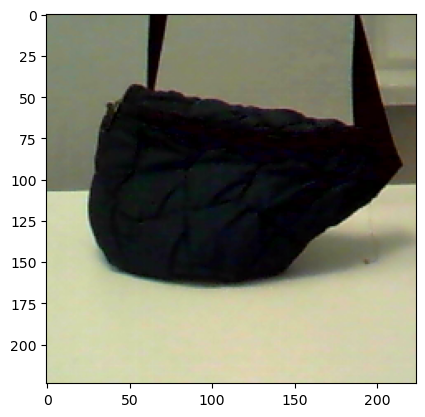

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [15]:
y_train[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [16]:
input_shape

(224, 224, 3)

In [17]:

model = keras.Sequential(
    [
        layers.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="tanh"),
        layers.Dense(7, activation="softmax"),
    ]
)


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 8)      32        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                        

In [19]:
model.compile(loss="categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              metrics=["accuracy"]
              )

In [20]:
cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    mode="auto",
    restore_best_weights=True,
)

In [21]:
model.fit(train, epochs=256, callbacks=cb, validation_data=test)

Epoch 1/256
2/2 [==============================] - 6s 3s/step - loss: 1.8448 - accuracy: 0.3747 - val_loss: 7.7074 - val_accuracy: 0.1102
Epoch 2/256
2/2 [==============================] - 5s 2s/step - loss: 0.6417 - accuracy: 0.8379 - val_loss: 7.2944 - val_accuracy: 0.1610
Epoch 3/256
2/2 [==============================] - 6s 3s/step - loss: 0.3372 - accuracy: 0.9053 - val_loss: 6.9587 - val_accuracy: 0.2119
Epoch 4/256
2/2 [==============================] - 6s 3s/step - loss: 0.2092 - accuracy: 0.9411 - val_loss: 6.7198 - val_accuracy: 0.1949
Epoch 5/256
2/2 [==============================] - 6s 3s/step - loss: 0.1568 - accuracy: 0.9663 - val_loss: 6.5341 - val_accuracy: 0.2034
Epoch 6/256
2/2 [==============================] - 6s 3s/step - loss: 0.1148 - accuracy: 0.9705 - val_loss: 6.3765 - val_accuracy: 0.2034
Epoch 7/256
2/2 [==============================] - 6s 3s/step - loss: 0.0863 - accuracy: 0.9832 - val_loss: 6.2511 - val_accuracy: 0.1864
Epoch 8/256
2/2 [=================